In [5]:
import numpy as np

In [31]:

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(y):
  return y*(1-y)

class neuralNetwork:
  def __init__(self,x,y):
    self.input=x
    self.w1=np.random.rand(self.input.shape[1],4)
    self.w2=np.random.rand(4,1)
    self.y=y
    self.lr=0.01
    self.output=np.zeros(self.y.shape)
  def feedforward(self):
    self.layer1=sigmoid(np.dot(self.input,self.w1))
    self.output=sigmoid(np.dot(self.layer1,self.w2))
    self.loss=self.y-self.output
    self.mse=np.square(np.subtract(self.y,self.output)).mean()
    
  def backprop(self):
    
    d_w_2=np.dot(self.layer1.T,(2*(self.y-self.output)*sigmoid_derivative(self.output)))
    d_w_1=np.dot(self.input.T,
                 (np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output),self.w2.T)*sigmoid_derivative(self.layer1)))
    self.w1+=d_w_1
    self.w2+=d_w_2



In [33]:
x=np.array([
  [0,0,1],
  [0,1,1],
  [1,0,1],
  [1,1,1]
])
y=np.array([
  [0],[1],[1],[0]
])
nn=neuralNetwork(x,y)
nn.feedforward()
#nn.backprop()
print(nn.output)
print(nn.mse)


[[0.77104431]
 [0.80867418]
 [0.80738769]
 [0.83345983]]
0.34071742326014864


In [35]:
iter=[]
mse_loss=[]
for i in range(1500):
    nn.feedforward()
    nn.backprop()
    iter.append(i)
    mse_loss.append(nn.mse)
    
    
print(nn.output)

[[0.0129411 ]
 [0.9805929 ]
 [0.97854481]
 [0.02242811]]


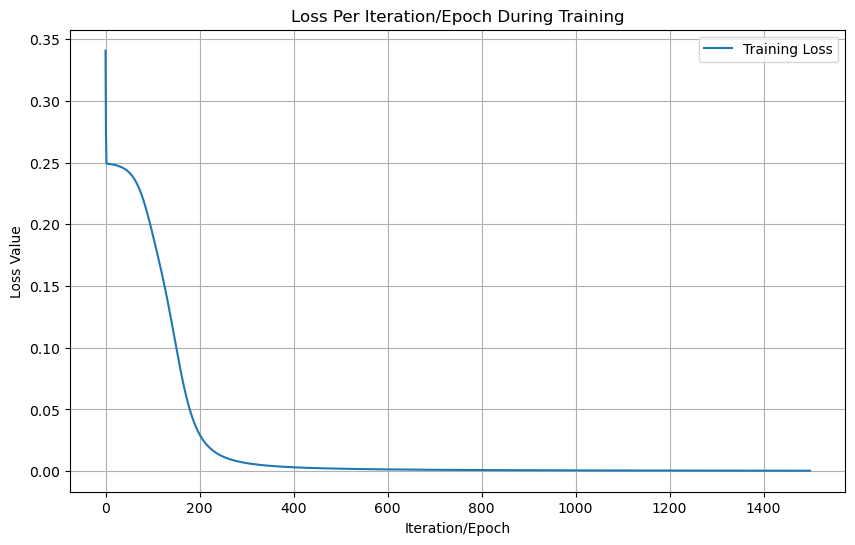

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(mse_loss, label='Training Loss')
plt.title('Loss Per Iteration/Epoch During Training')
plt.xlabel('Iteration/Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

# Activation Functions

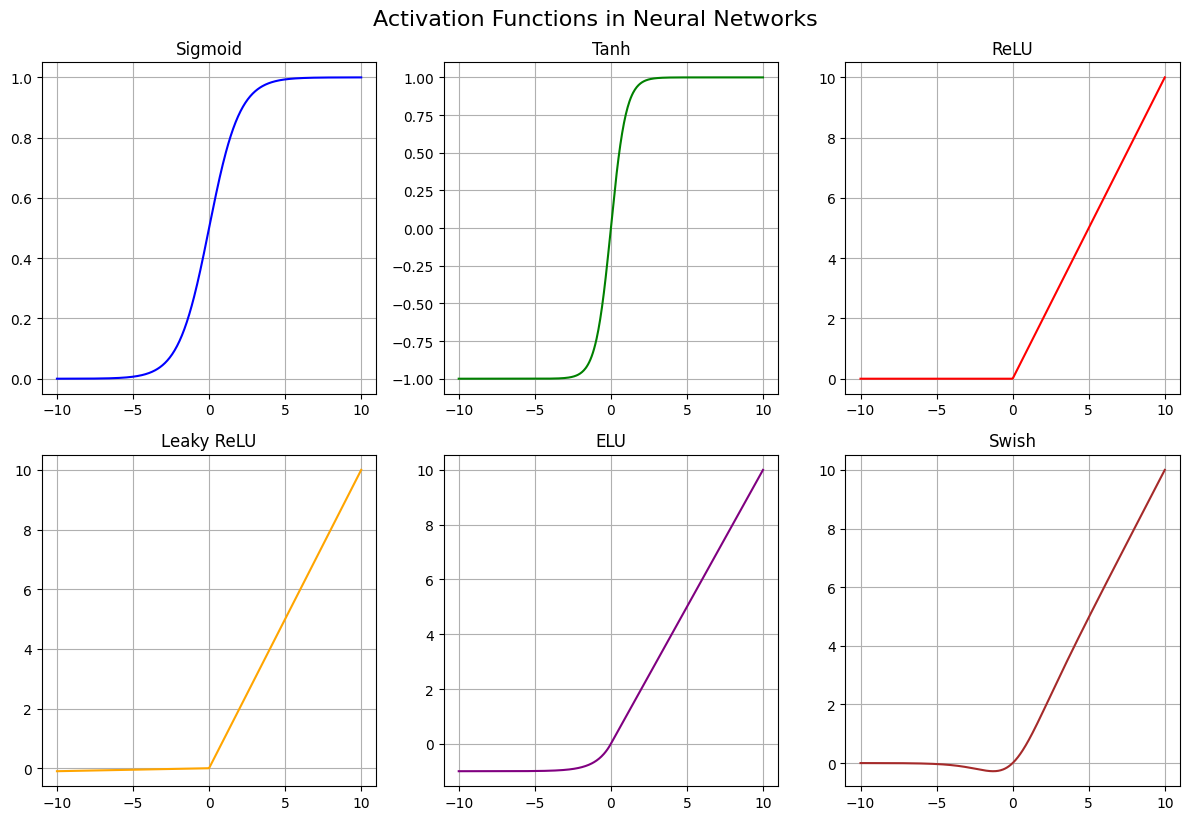

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(-10, 10, 500)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x), label='Tanh', color='green')
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, relu(x), label='ReLU', color='red')
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='orange')
plt.title('Leaky ReLU')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, elu(x), label='ELU', color='purple')
plt.title('ELU')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(x, swish(x), label='Swish', color='brown')
plt.title('Swish')
plt.grid(True)

plt.tight_layout()
plt.suptitle("Activation Functions in Neural Networks", fontsize=16, y=1.02)
plt.show()


In [19]:
#!pip install keras

In [7]:
X=np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
Y=np.array([
    [0],[1],[1],[0]
])


In [8]:
print(X.shape[1])

3


In [35]:

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=X.shape[1]))
model.add(Dense(121,activation="sigmoid"))
model.add(Dense(54,activation="sigmoid"))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history=model.fit(X,Y,epochs=800,verbose=1)

Epoch 1/800
1/1 [==============================] - 2s 2s/step - loss: 0.7352 - accuracy: 0.5000
Epoch 2/800
1/1 [==============================] - 0s 17ms/step - loss: 0.7284 - accuracy: 0.5000
Epoch 3/800
1/1 [==============================] - 0s 21ms/step - loss: 0.7221 - accuracy: 0.5000
Epoch 4/800
1/1 [==============================] - 0s 7ms/step - loss: 0.7165 - accuracy: 0.5000
Epoch 5/800
1/1 [==============================] - 0s 9ms/step - loss: 0.7115 - accuracy: 0.5000
Epoch 6/800
1/1 [==============================] - 0s 17ms/step - loss: 0.7072 - accuracy: 0.5000
Epoch 7/800
1/1 [==============================] - 0s 11ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 8/800
1/1 [==============================] - 0s 11ms/step - loss: 0.7006 - accuracy: 0.5000
Epoch 9/800
1/1 [==============================] - 0s 12ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 10/800
1/1 [==============================] - 0s 9ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 11/800
1/1 [======

In [37]:
predictions=model.predict(np.array([[0,1,1]]))

1/1 [==============================] - 0s 128ms/step


In [39]:
print(predictions)

[[0.9805865]]


In [41]:
print(predictions[0][0])

0.9805865


In [18]:
import pandas as pd
import numpy as np

In [58]:
iris=pd.read_csv("iris.csv")

In [60]:
iris.drop(columns=["Unnamed: 0"],inplace=True)

In [62]:
iris.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [70]:
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

In [72]:
train_x,test_x,train_y,test_y=train_test_split(X,y_one_hot,test_size=0.2)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model=Sequential()
model.add(Dense(64,activation="relu",input_dim=4))
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [38]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [40]:
history=model.fit(train_x,train_y,epochs=100,verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 6ms/step - loss: 1.1084 - accuracy: 0.5583
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9977 - accuracy: 0.6083
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9504 - accuracy: 0.7000
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8877 - accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8317 - accuracy: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7914 - accuracy: 0.5750
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7448 - accuracy: 0.6833
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6968 - accuracy: 0.7000
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.7000
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7000
Epoch 11/100
4/4 [===========

In [74]:
y_test_pred=model.predict(test_x)

1/1 [==============================] - 0s 129ms/step


In [102]:
m = tf.keras.metrics.CategoricalAccuracy()

In [106]:
m.update_state(test_y, y_test_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=30.0>

In [108]:
accuracy = m.result().numpy()

In [110]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666388511658


In [100]:
#print(y_test_pred)

In [78]:
#predicted_classes_indices = np.argmax(y_test_pred, axis=1)

In [44]:
class_name={0:"setosa",1:"versicolor",2:"virginica"}

In [80]:
#predicted_class_names = [class_name[i] for i in predicted_classes_indices]

In [96]:
#predicted_class_names

In [88]:
#y_original = np.argmax(test_, axis=-1)

In [92]:
#test_y_lables = [class_name[i] for i in test_y_original]

In [98]:
#test_y_lables

In [113]:
prediction_sample=model.predict(np.array([[5.1,3.5,1.3,1.2]]))

1/1 [==============================] - 0s 46ms/step


In [131]:
np.set_printoptions(suppress=True, precision=6) 
prediction_sample*100

array([[99.51388 ,  0.48612 ,  0.000003]], dtype=float32)

In [133]:
print(np.sum(prediction_sample))

0.99999994


In [46]:
predicted_class_sample = np.argmax(prediction_sample, axis=1)
predicted_species_name = class_name[predicted_class_sample[0]]
print(f"Prediction for sample : {predicted_species_name}")

Prediction for sample : setosa
